# Model & Feature Evaluation
Erin Cameron  
COSC3117  
2022-11-28
---

In [1]:
# Import statements
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics

# 1.0) Load results from testing dataset

In notebook 2, we ran Logistic Regression, Naive Bayes & Random Forest to predict if a flight is cancelled or not. We are loading the results from each algorithms' predicitions here. 

In [2]:
# specify results files & location
results_path = "../results/"
prediction_files = ["RandomForest_Predictions.csv", 
                    "LogisiticRegression_Predictions.csv",
                    "CategoricalNaiveBayes_Predictions.csv"
                   ]
feature_files = ["RandomForest_MDI_FeatureImportance.csv",
                 "LogisiticRegression_FeatureImportance.csv"
                ]

In [3]:
# store results in dictionaries, 1 for predictons and 1 for feature importance (if applicable for method)
predictions = {}
for file in prediction_files:
    pred = pd.read_csv(results_path + file, index_col = 0)
    predictions[pred["Method"].unique()[0]] = pred

features = {}
for file in feature_files:
    feat = pd.read_csv(results_path + file, index_col = 0)
    features[feat["Method"].unique()[0]] = feat

# 2.0) Compare performance across classificaion algorithms

accuracy, recall, precision, ROC, AUC, confusion matrix, plotting

> Reference: https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score
> good for imbalanced datasets like ours, where we have way more not cancelled flights. average of recall for each class aka the macro-average of recall scores per class  
  
> macro vs. micro average: https://www.educative.io/answers/what-is-the-difference-between-micro-and-macro-averaging  

> The Hamming loss is the fraction of labels that are incorrectly predicted: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html#sklearn.metrics.hamming_loss

## 2.1) Calculate evaluation metrics




************************************************************
RandomForest
************************************************************
Remember: '0' = not cancelled, '1' = cancelled


======= Confusion Matrix ======= 



Predicited Label,0,1,Num. Events,Prop. Correct,Prop. Incorrect
Actual Label,,,,,
0,77526,175,77701,0.998000,0.002000
1,2029,270,2299,0.117442,0.882558


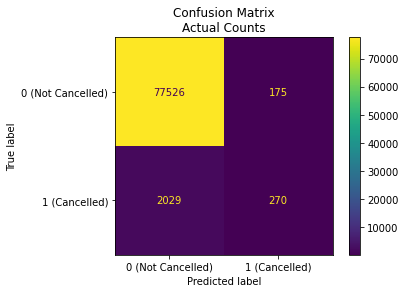

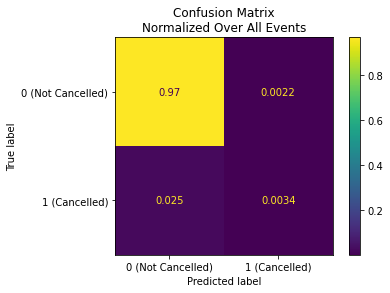


======= Performance metrics ======= 

Balanced Accuracy...0.5576
Hamming Loss...0.02755
Classification report...
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     77701
           1       0.61      0.12      0.20      2299

    accuracy                           0.97     80000
   macro avg       0.79      0.56      0.59     80000
weighted avg       0.96      0.97      0.96     80000




************************************************************
LogisticRegression
************************************************************
Remember: '0' = not cancelled, '1' = cancelled


======= Confusion Matrix ======= 



Predicited Label,0,1,Num. Events,Prop. Correct,Prop. Incorrect
Actual Label,,,,,
0,57141,20560,77701,0.735000,0.265000
1,859,1440,2299,0.626359,0.373641


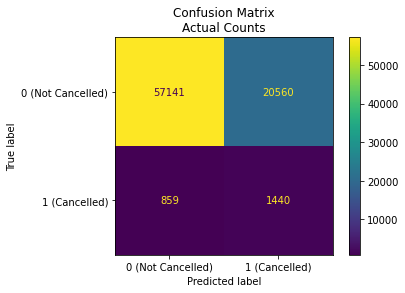

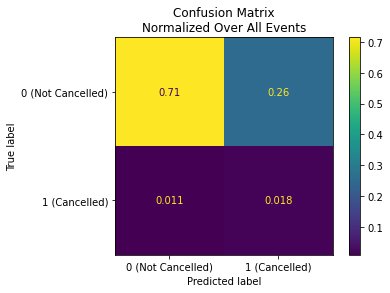


======= Performance metrics ======= 

Balanced Accuracy...0.68088
Hamming Loss...0.26774
Classification report...
              precision    recall  f1-score   support

           0       0.99      0.74      0.84     77701
           1       0.07      0.63      0.12      2299

    accuracy                           0.73     80000
   macro avg       0.53      0.68      0.48     80000
weighted avg       0.96      0.73      0.82     80000




************************************************************
Categorical Naive Bayes
************************************************************
Remember: '0' = not cancelled, '1' = cancelled


======= Confusion Matrix ======= 



Predicited Label,0,1,Num. Events,Prop. Correct,Prop. Incorrect
Actual Label,,,,,
0,77528,173,77701,0.998000,0.002000
1,2173,126,2299,0.054806,0.945194


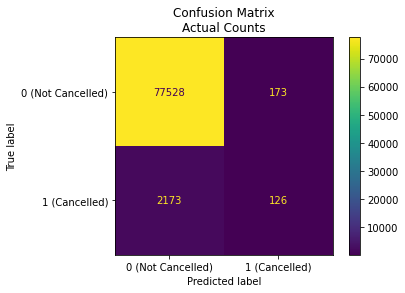

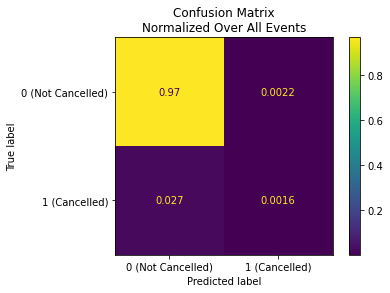


======= Performance metrics ======= 

Balanced Accuracy...0.52629
Hamming Loss...0.02932
Classification report...
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     77701
           1       0.42      0.05      0.10      2299

    accuracy                           0.97     80000
   macro avg       0.70      0.53      0.54     80000
weighted avg       0.96      0.97      0.96     80000



In [4]:
confusion_mats = {}
eval_metrics = {}

for method in predictions:

    print("\n\n")
    print("*" * 60)
    print(method)
    print("*" * 60)
    print("Remember: '0' = not cancelled, '1' = cancelled")
    print("\n")

    actual = predictions[method]["Actual Label"]
    predicted = predictions[method]["Predicited Label"]

    print("======= Confusion Matrix ======= \n")

    cm = pd.crosstab(actual, predicted)
    cm["Num. Events"] = cm[0] + cm[1]
    cm["Prop. Correct"] = round(cm[0]/(cm["Num. Events"]), 3)
    cm["Prop. Incorrect"] = round(cm[1]/(cm["Num. Events"]), 3)
    cm.iloc[1,3] = cm.iloc[1,1] / cm.iloc[1,2] # manual fix
    cm.iloc[1,4] = cm.iloc[1,0] / cm.iloc[1,2]
    confusion_mats[method] = cm
    display(cm)

    print("\n")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(actual, predicted),
                                                display_labels = ["0 (Not Cancelled)", "1 (Cancelled)"]
                                               )
    cm_display.plot()
    plt.title("Confusion Matrix\nActual Counts")
    plt.show() 

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(actual, predicted, normalize = 'all'),
                                                display_labels = ["0 (Not Cancelled)", "1 (Cancelled)"]
                                               )
    cm_display.plot()
    plt.title("Confusion Matrix\nNormalized Over All Events")
    plt.show() 

    print("\n======= Performance metrics ======= \n")
    class_report = metrics.classification_report(actual, predicted, output_dict=True)
    class_report["balanced_accuracy"] = round(metrics.balanced_accuracy_score(actual, predicted), 5)
    class_report["hamming_loss"] = round(metrics.hamming_loss(actual, predicted), 5)
    print("Balanced Accuracy..." + str(class_report["balanced_accuracy"]))
    # plot hamming loss (aka proportion incorrect) within each class
    print("Hamming Loss..." + str(class_report["hamming_loss"]))
    print("Classification report...")
    print(metrics.classification_report(actual, predicted))
    eval_metrics[method] = class_report

## 2.2) Compare evaluation metrics across methods


### 2.2.1) Accuracy & Hamming Loss


- Accuracy is the number of predictions the model got correct
- Balanced accuracy is for class imbalanced dataset (ie big difference in number of labels, flights cancelled vs not): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

### Across all classes/labels

**************************************************
accuracy across all classes
**************************************************


,accuracy
RandomForest,0.972450
Categorical Naive Bayes,0.970675
LogisticRegression,0.732263


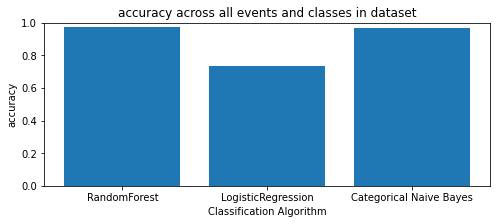

**************************************************
balanced_accuracy across all classes
**************************************************


,balanced_accuracy
LogisticRegression,0.68088
RandomForest,0.55760
Categorical Naive Bayes,0.52629


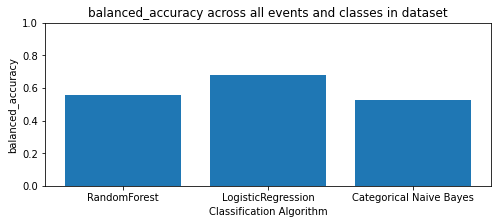

**************************************************
hamming_loss across all classes
**************************************************


,hamming_loss
LogisticRegression,0.26774
Categorical Naive Bayes,0.02932
RandomForest,0.02755


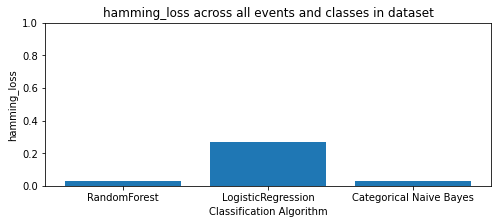

In [53]:
# accuracy & hamming_loss across all classes/labels
metrics = ["accuracy", "balanced_accuracy", "hamming_loss"]

for metric in metrics:
    
    print("*" * 50)
    print(metric + " across all classes")
    print("*" * 50)
    
    to_plot = {}
    
    for method in eval_metrics:
        to_plot[method] = eval_metrics[method][metric]
        
    to_plot = pd.DataFrame(to_plot.values(), to_plot.keys(), columns = [metric])
    
    display(to_plot.sort_values(metric, ascending = False))

    plt.figure(figsize = [8,3])
    plt.bar(to_plot.index, to_plot[metric])
    plt.ylabel(metric)
    plt.xlabel("Classification Algorithm")
    plt.ylim(0,1)
    plt.title(metric + " across all events and classes in dataset")
    plt.show()

    

### Within individual classes

**************************************************
Accuracy within individual classes
**************************************************


,RandomForest,LogisticRegression,Categorical Naive Bayes
Actual Label,,,
0,0.998000,0.735000,0.998000
1,0.117442,0.626359,0.054806


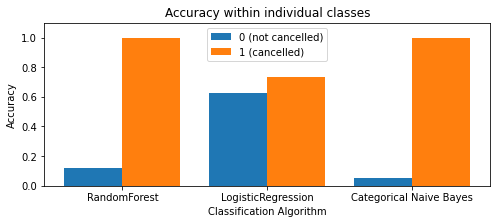

**************************************************
Hamming Loss within individual classes
**************************************************


,RandomForest,LogisticRegression,Categorical Naive Bayes
Actual Label,,,
0,0.002000,0.265000,0.002000
1,0.882558,0.373641,0.945194


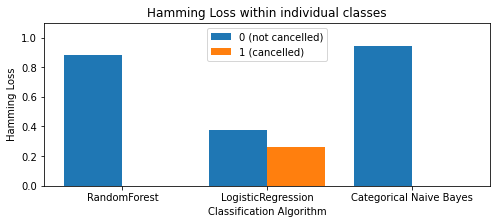

In [111]:
# plot accuracy (number correctly labelled) & hamming loss (number incorrectly labelled) within classes (cancelled vs not)
# accuracy & hamming_loss across all classes/labels
metrics = ["Prop. Correct", "Prop. Incorrect"]

for metric in metrics:
    
    if metric == "Prop. Correct":
        metric_name = "Accuracy"
    elif metric == "Prop. Incorrect":
        metric_name = "Hamming Loss"
    
    print("*" * 50)
    print(metric_name + " within individual classes")
    print("*" * 50)
    
    to_plot = {}
    
    for method in confusion_mats:
        
        to_plot[method] = confusion_mats[method][metric]
        to_plot = pd.DataFrame(to_plot)
    
    display(to_plot)

    # define plotting data
    x = (np.arange(to_plot.shape[1]) + 1)
    cancelled_1 = to_plot.iloc[0, :]
    notcancelled_0 = to_plot.iloc[1, :]
    width = 0.40
    
    # plot data in grouped manner of bar type
    plt.figure(figsize = [8,3])
    plt.bar(x-0.2, notcancelled_0, width, label = "0 (not cancelled)")
    plt.bar(x+0.2, cancelled_1, width, label = "1 (cancelled)")
    plt.xticks(ticks = x, labels = to_plot.columns.to_list())
    plt.ylabel(metric_name)
    plt.xlabel("Classification Algorithm")
    plt.title(metric_name + " within individual classes")
    plt.ylim(0, 1.1)
    plt.legend()
    plt.show()

### 2.2.2) Precision, Recall & F1-Score


Accuracy can be decieving on class-imbalanced dataset like ours, where there is a significant difference between the number of positive and negative labels. Accordingly, we have to use precision and recall as additional metrics to assess preformance. 

- Precision: Quantifies the number of correct positive predictions made out of positive predictions made by the model
- Macro precision: mean of precision values of individual classes

- Recall (aka sensitivity): Quantifies the number of positive predictions correctly made out of all possible positive predictions.
- Macro recall: mean of recall values of individual classes
- Weighted recall: average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall. Weighted recall is equal to accuracy.
- F1-score keeps the balance between precision and recall. It’s often used when class distribution is uneven, but it can also be defined as a statistical measure of the accuracy of an individual test.

https://neptune.ai/blog/balanced-accuracy
https://developers.google.com/machine-learning/crash-course/classification/accuracy  
https://neptune.ai/blog/balanced-accuracy  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html (ctrl+F "weighted")

### Across all classes/labels

In [121]:
calculations = ["macro avg", "weighted avg"]
metrics = ["precision", "recall", "f1-score"]

**************************************************
macro avg
**************************************************


=====> macro avg - precision....




,precision
RandomForest,0.790619
Categorical Naive Bayes,0.697070
LogisticRegression,0.525322


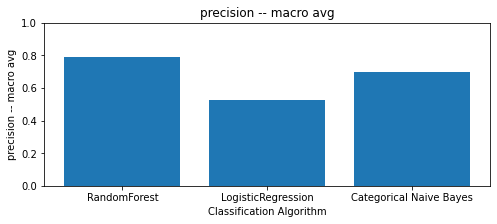



=====> macro avg - recall....




,recall
LogisticRegression,0.680878
RandomForest,0.557595
Categorical Naive Bayes,0.526290


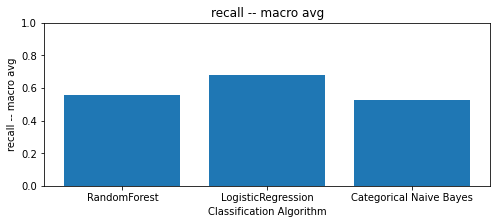



=====> macro avg - f1-score....




,f1-score
RandomForest,0.591389
Categorical Naive Bayes,0.541047
LogisticRegression,0.480342


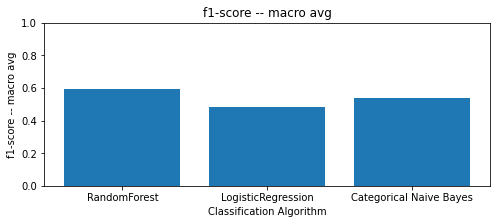

**************************************************
weighted avg
**************************************************


=====> weighted avg - precision....




,precision
RandomForest,0.963927
LogisticRegression,0.958759
Categorical Naive Bayes,0.956892


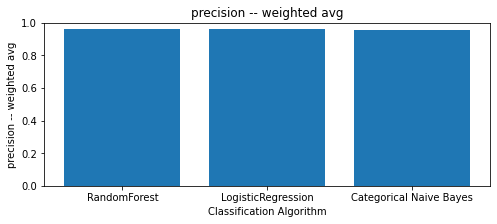



=====> weighted avg - recall....




,recall
RandomForest,0.972450
Categorical Naive Bayes,0.970675
LogisticRegression,0.732263


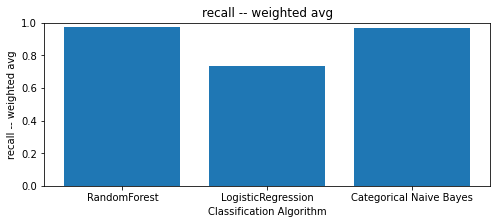



=====> weighted avg - f1-score....




,f1-score
RandomForest,0.963305
Categorical Naive Bayes,0.959574
LogisticRegression,0.821365


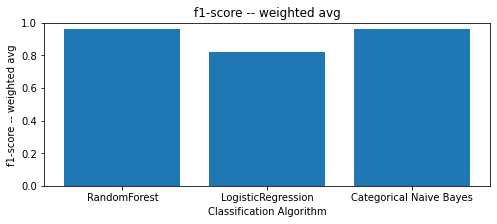

In [128]:
for calculation in calculations:
    
    print("*" * 50)
    print(calculation)
    print("*" * 50)

    for metric in metrics:

        print("\n\n=====> " + calculation + " - " + metric + "....\n\n")
        to_plot = {}

        for method in eval_metrics:
            to_plot[method] = eval_metrics[method][calculation][metric]

        to_plot = pd.DataFrame(to_plot.values(), to_plot.keys(), columns = [metric])

        display(to_plot.sort_values(metric, ascending = False))

        plt.figure(figsize = [8,3])
        plt.bar(to_plot.index, to_plot[metric])
        plt.ylabel(metric + " -- " + calculation)
        plt.xlabel("Classification Algorithm")
        plt.ylim(0,1)
        plt.title(metric + " -- " + calculation)
        plt.show()

### Within each label

In [178]:
# format a big dataframe for plotting
to_plot = {}

for method in eval_metrics:

    # not cancelled
    df_0 = pd.DataFrame(eval_metrics[method]["0"].values(), eval_metrics[method]["0"].keys(), columns = ["value"])
    df_0["Method"] = method
    df_0["Metric"] = df_0.index
    df_0["Class"] = "0 (not cancelled)"
    df_0 = df_0.reset_index(drop = True)

    # cancelled
    df_1 = pd.DataFrame(eval_metrics[method]["1"].values(), eval_metrics[method]["1"].keys(), columns = ["value"])
    df_1["Method"] = method
    df_1["Metric"] = df_1.index
    df_1["Class"] = "1 (cancelled)"
    df_1 = df_1.reset_index(drop = True)
    
    # concat class dfs together
    to_plot[method] = pd.concat([df_0, df_1], ignore_index = True)
    
# combine across methods & display 
to_plot = pd.concat(to_plot.values(), ignore_index = True)
display(to_plot)

,value,Method,Metric,Class
0,0.974496,RandomForest,precision,0 (not cancelled)
1,0.997748,RandomForest,recall,0 (not cancelled)
2,0.985985,RandomForest,f1-score,0 (not cancelled)
3,77701.000000,RandomForest,support,0 (not cancelled)
4,0.606742,RandomForest,precision,1 (cancelled)
5,0.117442,RandomForest,recall,1 (cancelled)
6,0.196793,RandomForest,f1-score,1 (cancelled)
7,2299.000000,RandomForest,support,1 (cancelled)
8,0.985190,LogisticRegression,precision,0 (not cancelled)
9,0.735396,LogisticRegression,recall,0 (not cancelled)


<Figure size 216x432 with 0 Axes>

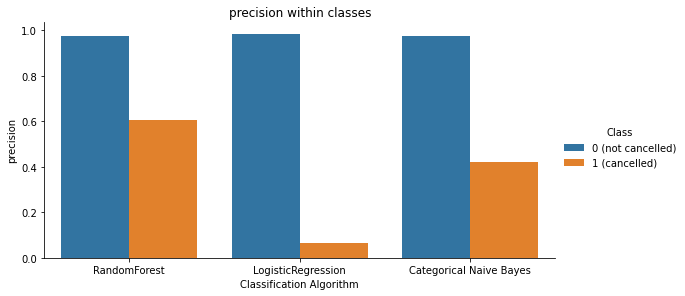

<Figure size 216x432 with 0 Axes>

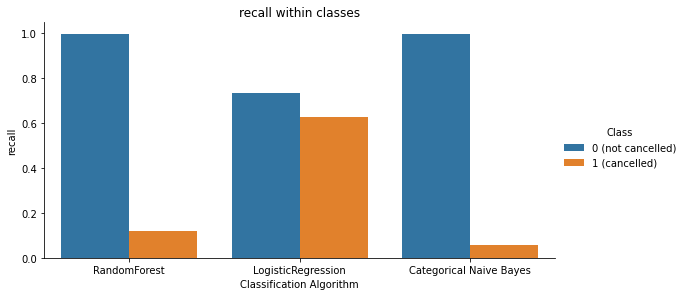

<Figure size 216x432 with 0 Axes>

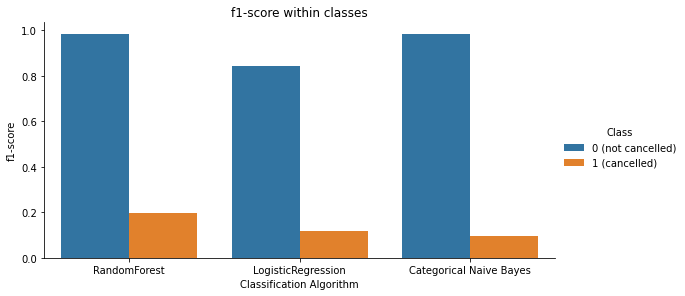

In [193]:
# plot each of the metrics as a grouped bar plot
metrics = ["precision", "recall", "f1-score"]

for metric in metrics:
    
    # subset df by metric
    sub = to_plot[to_plot["Metric"] == metric]
    
    plt.figure(figsize=(3,6))
    g = sns.catplot(data = sub, 
                    kind = "bar", 
                    x = "Method", 
                    y = "value", 
                    hue = "Class",
                    height = 4,
                    aspect = 2
                   )
    plt.ylabel(metric)
    plt.xlabel("Classification Algorithm")
    plt.title(metric + " within classes")
    plt.show()

# 3.0) Evaluate feature importance across algorithms

Which features are the most predicitve of flight cancellation? Are the same features the most important across multiple algorithms. Note, we cannot evalute feature importance for the Naive Bayes Classifier due to the methodology -- this section focusses on logisitic regression and random forest only. 

- Random Forest: feature importance measured using Mean Decrease in Impurity (MDI). Higher values = feature is more important. STd calculated from MDI of 100 trees used in model to generate consensus model tree. See here for more info https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html
- Logisitc regression: feature importance calculated using Feature Coefficient. Higher values = feature is more important. Description @ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [203]:
# how many features used in each model, there will be lots because we binarized columns with lots of categories (ie. airline)
print("====> RandomForest_MDI...." + str(len(features["RandomForest_MDI"]["Feature"].unique())) + " features")
print("====> LogisticRegression...." + str(len(features["LogisticRegression"]["Feature"].unique())) + " features")

====> RandomForest_MDI....952 features
====> LogisticRegression....952 features


,Method,Feature Coefficient
Feature,,
Month__4,LogisticRegression,1.305623
Month__3,LogisticRegression,0.871320
DayofMonth__31,LogisticRegression,0.629113
Airline__Allegiant Air,LogisticRegression,0.576556
Year__2020,LogisticRegression,0.466339
OriginStateName__New Jersey,LogisticRegression,0.419858
"OriginCityName__Newark, NJ",LogisticRegression,0.399758
DestStateName__New Jersey,LogisticRegression,0.387866
"DestCityName__Newark, NJ",LogisticRegression,0.370767


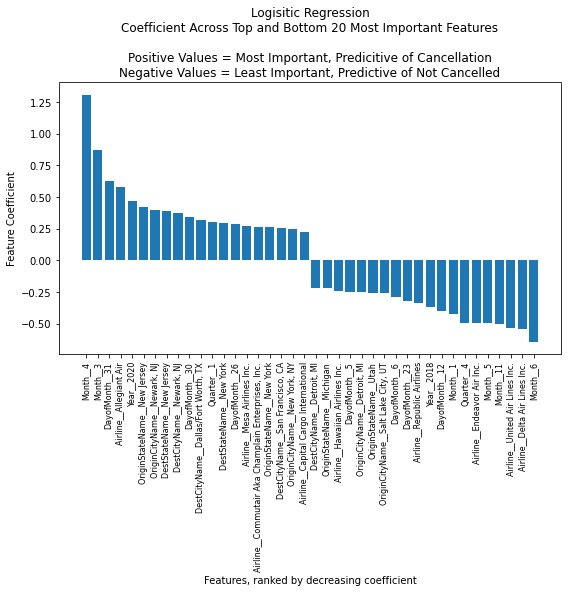

In [217]:
# plot top and bottom features for each logistic regression
nfeats = 20
featCoeffs = features["LogisticRegression"].sort_values("Feature Coefficient", ascending = False)
top_N = pd.concat([featCoeffs.head(nfeats),featCoeffs.tail(nfeats)]).set_index("Feature")
display(top_N)
plt.figure(figsize = [9, 5])
plt.bar(top_N.index, top_N["Feature Coefficient"])
plt.xticks(fontsize = 8, rotation = 90)
plt.ylabel("Feature Coefficient")
plt.title("Logisitic Regression\nCoefficient Across Top and Bottom 20 Most Important Features\n\nPositive Values = Most Important, Predicitive of Cancellation\nNegative Values = Least Important, Predictive of Not Cancelled")
plt.xlabel("Features, ranked by decreasing coefficient")
plt.show()

,Method,FeatureImportance_MDI,std
Feature,,,
CRSDepTime,RandomForest_MDI,8.561582e-02,4.675921e-03
Distance,RandomForest_MDI,5.864067e-02,3.016292e-03
Year__2020,RandomForest_MDI,3.611399e-02,2.081721e-02
Month__4,RandomForest_MDI,2.384241e-02,1.737297e-02
Month__3,RandomForest_MDI,1.216569e-02,4.536454e-03
Year__2019,RandomForest_MDI,1.179473e-02,6.266164e-03
DayOfWeek__4,RandomForest_MDI,1.170346e-02,1.917752e-03
DayOfWeek__3,RandomForest_MDI,1.149720e-02,1.800567e-03
DayOfWeek__1,RandomForest_MDI,1.145901e-02,2.264676e-03


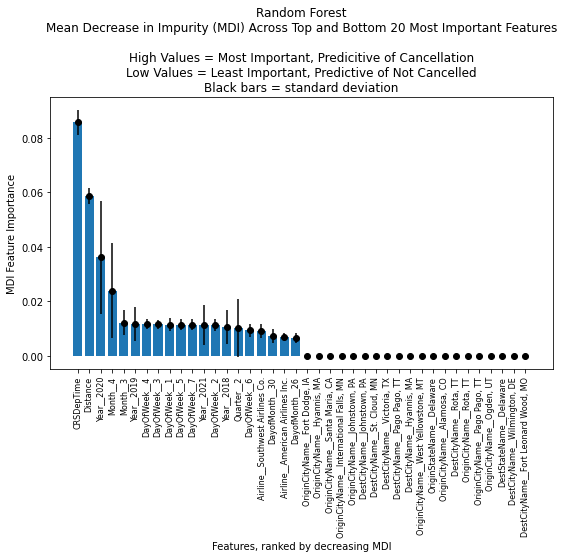

In [231]:
# plot top and bottom 
nfeats = 20
featCoeffs = features["RandomForest_MDI"].sort_values("FeatureImportance_MDI", ascending = False)
top_N = pd.concat([featCoeffs.head(nfeats),featCoeffs.tail(nfeats)]).set_index("Feature")
display(top_N)
plt.figure(figsize = [9, 5])
plt.bar(top_N.index, top_N["FeatureImportance_MDI"])
plt.errorbar(top_N.index, top_N["FeatureImportance_MDI"], yerr=top_N["std"], fmt="o", color="black")
plt.xticks(fontsize = 8, rotation = 90)
plt.ylabel("MDI Feature Importance")
plt.title("Random Forest\nMean Decrease in Impurity (MDI) Across Top and Bottom 20 Most Important Features\n\nHigh Values = Most Important, Predicitive of Cancellation\nLow Values = Least Important, Predictive of Not Cancelled\nBlack bars = standard deviation")
plt.xlabel("Features, ranked by decreasing MDI")
plt.show()